# Project-05 -  "Advertising company of an online store"

- You work in the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

- Here is the data until 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

- In the data set, the abbreviation ESRB (Entertainment Software Rating Board) comes across - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen.

### 1. Let's open the data file and examine the general information:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
import scipy.stats as st

In [2]:
df = pd.read_csv('games.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 2. Data preparation:

#### 2.1 -  Change the column names to lower case:

In [3]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
             'critic_score', 'user_score', 'rating']

#### 2.2 - Convert the year of issue to an integer value:

In [4]:
df.year_of_release = df.year_of_release.astype('Int64')

#### 2.3 -  After checking that there are no values ​​with zero in the critics' ratings, we will replace it with an integer value:

In [5]:
df.critic_score.unique()
df.critic_score = df.critic_score.astype('Int64')

#### 2.4 - Missed 2 games in the title can be neglected, delete them:

In [6]:
df.name.isnull().sum()

2

In [7]:
df.query('name.isnull()')
df = df.dropna(axis='index', how='any', subset=['name'])

#### 2.5 - We checked the columns with platforms, genres, sales - everything is fine here.

In [8]:
df.platform.unique()
df.platform.isnull().sum()
df.genre.unique()
df.genre.isnull().sum()
df.na_sales.isnull().sum()
df.eu_sales.isnull().sum()
df.jp_sales.isnull().sum()
df.other_sales.isnull().sum()

0

#### 2.6 - There are a lot of missing values in the columns with user_score and critic_score, let's leave them as they are.
In the column with criticism of users there is data "tbd", meaning that there is no data yet, we will also replace
to empty values, NaN, and convert to "float"

In [9]:
df.critic_score.isnull().sum()

8576

In [10]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df.user_score = df.user_score.astype('float')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### 2.7 - Checked by ratings, there are missing values, but in general the data corresponds to the ESRB rating categories

In [12]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### 2.8 - Calculate the total sales and add a separate column.

In [13]:
df['total_sale'] = df.eu_sales + df.jp_sales + df.na_sales + df.other_sales

<ipython-input-13-d54859161449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sale'] = df.eu_sales + df.jp_sales + df.na_sales + df.other_sales


In [14]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


###  3. Exploratory data analysis:

#### 3.1 - How many games were released in different years?

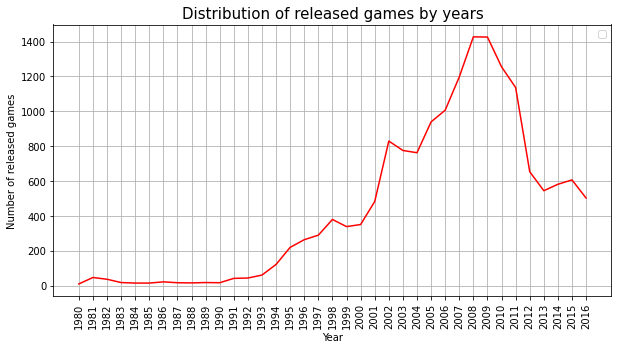

In [15]:
year = list(range(1980,2017))
year_pt = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
year_pt.plot(figsize = (10,5), color = 'red')
plt.title('Distribution of released games by years', fontsize = 15)
plt.xticks(year, rotation= 90)
plt.legend('')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of released games')
plt.show()


Looking at the histogram, we saw that, in general, the number of games began to increase in 1994, with a sharp rise after 2000, and after 2009, the number of released games began to decrease, which could have been affected by the 2008 crisis. For our analysis, we can take a selection from 2000.

In [16]:
df_over_2000 = df.query('year_of_release >= 2000')

#### 3.2 - Let's choose the platforms with the highest total sales and plot the distribution by years.

In [17]:
df_most_platform_sales = df_over_2000.groupby('platform')['total_sale'].sum()
df_most_platform_sales.sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
PC       205.72
GC       196.73
XOne     159.32
PS       140.70
WiiU      82.19
PSV       53.81
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: total_sale, dtype: float64

**Take the first 5 sales platforms and add PC**

In [18]:
most_pltf = df_over_2000.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS" or platform == "PC"')

Text(0, 0.5, 'Number of released games')

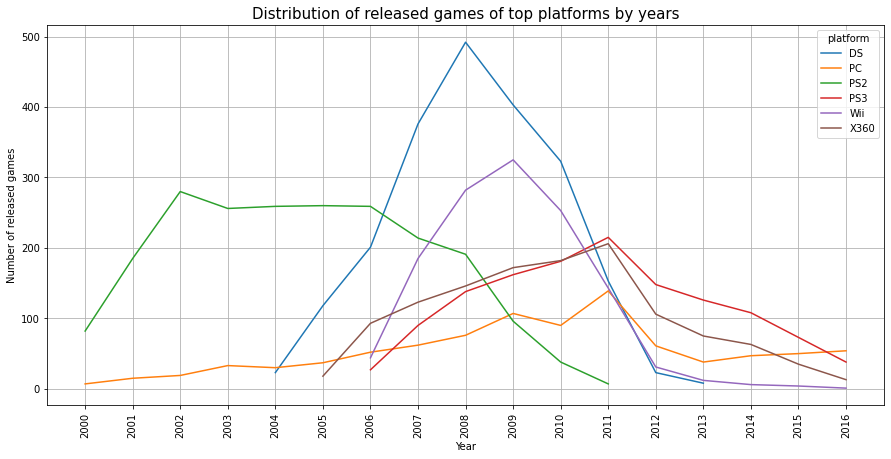

In [19]:
year = list(range(2000,2017))
most_pltf.pivot_table(index = 'year_of_release',columns = 'platform', values = 'name', aggfunc = 'count').plot(figsize = (15,7))
plt.title('Distribution of released games of top platforms by years', fontsize = 15)
plt.xticks(year, rotation= 90)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of released games')

According to the schedule, we can conclude that the average life span of the platform is 9-10 years. Only the PC differs in that it exists throughout the entire time, and by the end of the period of interest to us, it even becomes the leader in sales.
For further work, we will take the current period from 2006 to 2016 based on this information.

In [20]:
df_actual = df.query('year_of_release >= 2013')

#### 3.3 Which platforms are leading in sales, rising or falling? Let's choose a few potentially profitable platforms.

Text(0, 0.5, 'Sales amount, mln')

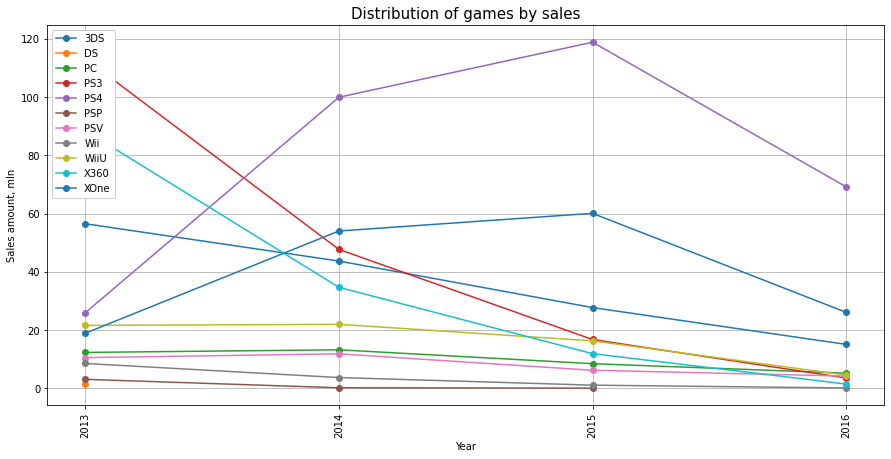

In [21]:
year = list(range(2013,2017))
df_potencial = df_actual.pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sale', aggfunc = 'sum')
df_potencial.plot(figsize = (15,7), marker="o")
plt.title('Distribution of games by sales', fontsize = 15)
plt.xticks(year, rotation= 90)
plt.grid()
plt.legend(loc=2,facecolor='w', framealpha=1)
plt.xlabel('Year')
plt.ylabel('Sales amount, mln')

As we can see, the main part of the platforms is already losing popularity. But PS4, XOne were at their peak until recently, so you can still invest in them for 2017. Less profitable 3DS, but let's leave it the same. Let's not forget about the PC, this platform is in demand and is becoming popular again.

#### 3.4 - How do user reviews and critics affect sales within one popular platform?
Build a scatterplot and calculate the correlation between reviews and sales.

In [22]:
df_xOne = df_actual.query('platform == "XOne"')
print()
print('Dependence of sales on evaluation of critics and users on xOne')
print('-'*53)
df_xOne[['total_sale','critic_score', 'user_score']].corr()


Dependence of sales on evaluation of critics and users on xOne
-----------------------------------------------------


,total_sale,critic_score,user_score
total_sale,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Text(0, 0.5, 'Sales amount, mln')

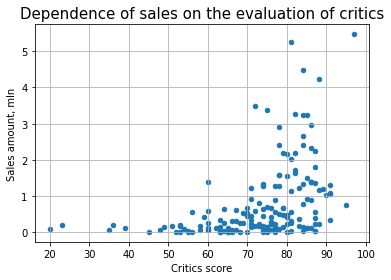

In [23]:
df_xOne.plot(kind='scatter', y = 'total_sale', x = 'critic_score')
plt.title('Dependence of sales on the evaluation of critics', fontsize = 15)
plt.grid()
plt.xlabel('Critics score')
plt.ylabel('Sales amount, mln')

Text(0, 0.5, 'Sales amount, mln')

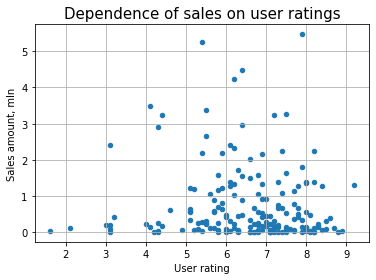

In [24]:
df_xOne.plot(kind='scatter', y = 'total_sale', x = 'user_score')
plt.title('Dependence of sales on user ratings', fontsize = 15)
plt.grid()
plt.xlabel('User rating')
plt.ylabel('Sales amount, mln')

- There is an average positive correlation between critics' ratings and sales (0.41), on the graph we see that with a rating of more than 70 games are sold more.
- There is no correlation between user rating and sales, the graph shows that games are sold with both a 3 and an 8 rating

#### 3.5 - Overall correlation across the entire dataset

In [25]:
df_actual[['total_sale','critic_score', 'user_score']].corr()

,total_sale,critic_score,user_score
total_sale,1.000000,0.313700,-0.002608
critic_score,0.313700,1.000000,0.502221
user_score,-0.002608,0.502221,1.000000


In fact, the situation is similar for the entire amount of data, insignificant, less than average dependence on the rating of critics, and almost no dependence on the rating of users.

#### 3.6 - Distribution of the number of released games by genre:

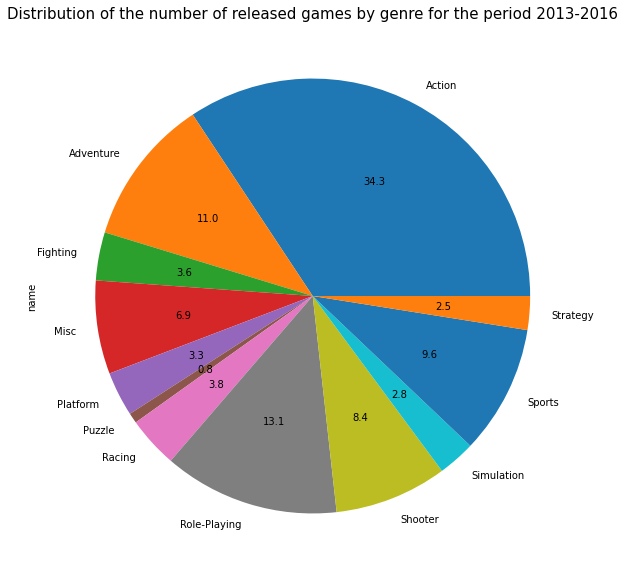

In [26]:
genre_pt = df_actual.pivot_table(index = 'genre', values = 'name', aggfunc = 'count')
genre_pt.plot(figsize = (10,10), kind = 'pie', subplots = True, autopct="%.1f", legend=None)
plt.title('Distribution of the number of released games by genre for the period 2013-2016', fontsize = 15)
plt.show()


Top three: `Action` (34%) , `Role-play` (13%), `Adventure` (11%), outsiders - Puzzle, Strategy, Simulation

#### 3.7 - Amount of game profits by genre:

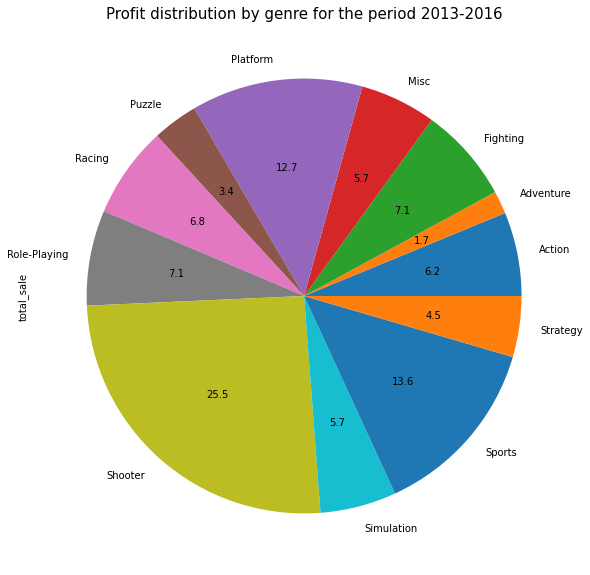

In [27]:
genre_pt = df_actual.pivot_table(index = 'genre', values = 'total_sale', aggfunc = 'median')
genre_pt.plot(figsize = (10,10), kind = 'pie', subplots = True, autopct="%.1f", legend=None)
plt.title('Profit distribution by genre for the period 2013-2016', fontsize = 15)
plt.show()


In the top three in sales: `Shooter, Sports, Platform` , outsiders - `Puzzle, Adventure, Strategy`

#### 3.8 - Portrait of the user of each region:

Distribution of sales by platform in selected regions


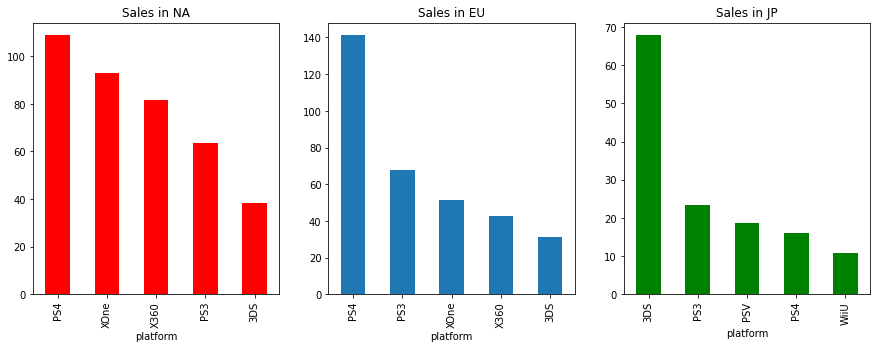

In [28]:
top5_na = df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
top5_eu = df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
top5_jp = df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]

print('Distribution of sales by platform in selected regions')
plt.subplot(1,3,1)
top5_na.plot(kind = 'bar', figsize = (15,5), color = 'r')
plt.title('Sales in NA')
plt.subplot(1,3,2)

plt.title('Sales in EU')
top5_eu.plot(kind = 'bar')

plt.subplot(1,3,3)
top5_jp.plot(kind = 'bar', color = 'g')
plt.title('Sales in JP')
plt.show()

In terms of sales, we will conclude that most sales are in Europe, America is in second place, and Japan is in last. By platforms:
- In America and Europe, the top five are the same platforms, 3DS in fifth place.
- In Japan, #DS is in first place, and instead of X360 and Wii, PSV, WiU are in the top

Distribution of sales by genre in selected regions


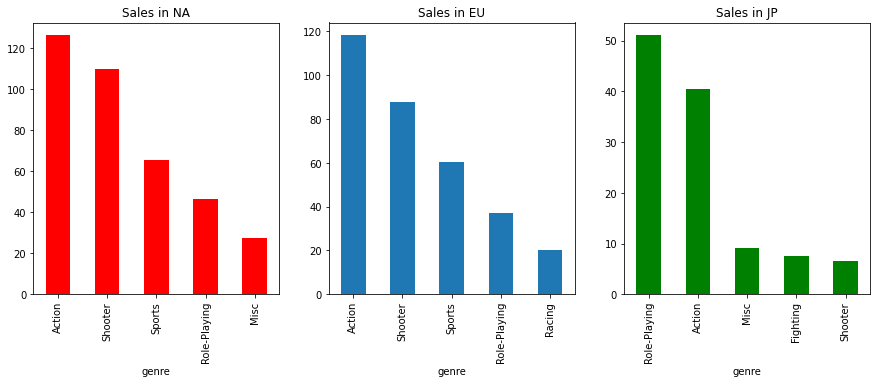

In [29]:
top5_na = df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]
top5_eu = df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]
top5_jp = df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]

print('Distribution of sales by genre in selected regions')
plt.subplot(1,3,1)
top5_na.plot(kind = 'bar', figsize = (15,5), color = 'r')
plt.title('Sales in NA')
plt.subplot(1,3,2)

plt.title('Sales in EU')
top5_eu.plot(kind = 'bar')

plt.subplot(1,3,3)
top5_jp.plot(kind = 'bar', color = 'g')
plt.title('Sales in JP')
plt.show()

- In America and Europe, the distribution is similar, the first 4 places are the same, different genres close the top, other genres and races.
- Again, Japan stands out, where role-playing games and action genres take 1-2 places by a wide margin.

In [30]:
# Replace the data where there is no rating with `No Rate`
df_actual['rating'] = df_actual['rating'].fillna('No Rate')

<ipython-input-30-cad590533768>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actual['rating'] = df_actual['rating'].fillna('No Rate')


Distribution of sales depending on the rating in individual regions


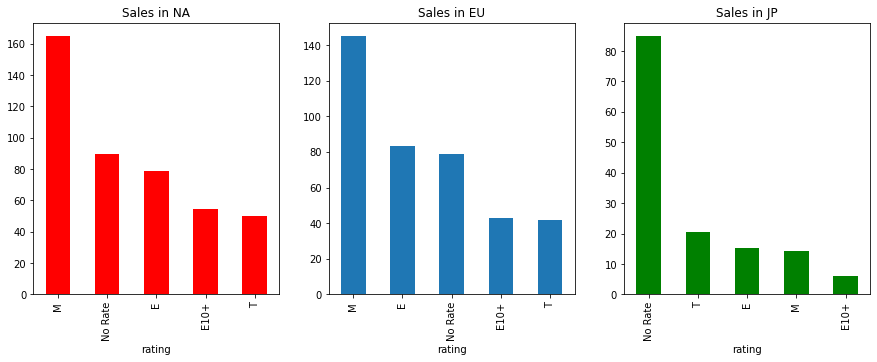

In [31]:
top5_na = df_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
top5_eu = df_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
top5_jp = df_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print('Distribution of sales depending on the rating in individual regions')
plt.subplot(1,3,1)
top5_na.plot(kind = 'bar', figsize = (15,5), color = 'r')
plt.title('Sales in NA')
plt.subplot(1,3,2)

plt.title('Sales in EU')
top5_eu.plot(kind = 'bar')

plt.subplot(1,3,3)
top5_jp.plot(kind = 'bar', color = 'g')
plt.title('Sales in JP')
plt.show()


   - Everywhere there are a lot of games on sale with an indeterminate rating, but Japan has the most.
   - In Europe and America, games with an M rating are in first place, unlike Japan, where M is in 4th place

### 4. Hypothesis testing

**Hypothesis 1: The average user ratings of the Xbox One and PC platforms are the same.**

- Null Hypothesis - The average user ratings of the Xbox One and PC platforms are the same.
- Alternative: - The average user ratings of the Xbox One and PC platforms are different.
- Let's take the threshold value of alpha 0.5

In [32]:
alpha = 0.05 
results = st.ttest_ind(
    df_over_2000.query('platform == "XOne"')['user_score'].dropna(), 
    df_over_2000.query('platform == "PC"')['user_score'].dropna())

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 3.750185722417337e-05
Rejecting the null hypothesis


**Conclusion:** We reject the null hypothesis, the average ratings are different / **The hypothesis is not confirmed**

In [33]:
print(df_over_2000.query('platform == "XOne"').user_score.mean())
print(df_over_2000.query('platform == "PC"').user_score.mean())
print()

6.521428571428572
7.0340599455040875



**Hypothesis 2: Average user ratings for Action and Sports are different**

- Null hypothesis - Average user ratings are different.
- Alternative: - Average user ratings are the same.
- Let's take the threshold value of alpha 0.5

In [34]:
alpha = 0.05 
results = st.ttest_ind(
    df_over_2000.query('genre == "Action"')['user_score'].dropna(), 
    df_over_2000.query('genre == "Sports"')['user_score'].dropna())

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.09063548503578989
Failed to reject the null hypothesis


**Conclusion:** We accept the null hypothesis, the average user ratings are different./ **Hypothesis - confirmed!**

### GENERAL CONCLUSIONS:
- In this project, we opened and viewed data on games released since 1985.
- First, we processed the missing values, converted the data to a logical and convenient type.
- Summarized the total number of sales and created a separate column with the sum
- After examining the data, we saw that in general the number of games began to increase in 1994, with a sharp rise after 2000, so for a start we singled out games released after 2000.
- We found the average duration of the platform "life" of the platform - 9-10 years. We took the actual period from 2013 to 2016 of the data set for further analysis.
- We looked at the dependence of profit on the genre, critics' and users' ratings, tested the hypotheses.
- Separately studied the data on the regions.

For the production of games for 2017, we will make the following forecast:
- For America, we advise you to release Action, Shooter rated M on PS4, XONE platforms
- For Europe - Action, Shooter rated M on PS4, PS3 platforms
- In Japan, RPG and Action will be better sold on 3DS, PS3 platforms

`*Data from Yandex Practicum was used for the project`